In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext
sc = SparkContext("local", "ProductsRDD")
sc.setLogLevel("ERROR")

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)

Saving Products_Details.csv to Products_Details (1).csv
Uploaded file: Products_Details (1).csv


In [ ]:
products_rdd = sc.textFile(file_name)
print("First 5 rows:", products_rdd.take(5))

First 5 rows: ['Product_ID,Product_Code,Product_Description,Product_Category,Product_Group,Brand,Unit_of_Measure,Pack_Type,Cost_Price,Sales_Price', '66,5150,Tell Tale Golden Delcious Apples,Fruit,Fresh Fruit,Golden,CARTON,Small,0.874434077,2.894074187', '86,1949228,Swell Canned Diced Fruit,Fruit,Canned Fruit,Heritage,KG,Small,0.988718279,2.287756966', "142,5218,High Top Green Pepper,Vegetables,Fresh Vegetables,Spencer's Retail,KG,Small,1.019933289,3.195768224", '72,1473377,Green Ribbon Canned Peaches,Fruit,Canned Fruit,Heritage,KG,Small,1.06721492,3.62433076']


In [ ]:
header = products_rdd.first()
data_rdd = products_rdd.filter(lambda row: row != header)
split_rdd = data_rdd.map(lambda row: row.split(","))

print("Parsed Example:", split_rdd.take(1))

Parsed Example: [['66', '5150', 'Tell Tale Golden Delcious Apples', 'Fruit', 'Fresh Fruit', 'Golden', 'CARTON', 'Small', '0.874434077', '2.894074187']]


In [ ]:
categories = split_rdd.map(lambda cols: cols[3]).distinct().collect()
print("Unique Categories:", categories)

Unique Categories: ['Fruit', 'Vegetables', 'Snack Foods', 'Dairy', 'Meat']


In [ ]:
profit_rdd = split_rdd.map(lambda cols: (cols[2], float(cols[9]) - float(cols[8])))
print("Sample Profit:", profit_rdd.take(5))

Sample Profit: [('Tell Tale Golden Delcious Apples', 2.01964011), ('Swell Canned Diced Fruit', 1.299038687), ('High Top Green Pepper', 2.175834935), ('Green Ribbon Canned Peaches', 2.55711584), ('Swell Canned Peaches', 2.5179207449999996)]


In [ ]:
cat_price_rdd = split_rdd.map(lambda cols: (cols[3], (float(cols[9]), 1)))
cat_avg = cat_price_rdd.reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])) \
                       .mapValues(lambda x: x[0] / x[1])

print("Average Sales Price by Category:", cat_avg.collect())

Average Sales Price by Category: [('Fruit', 2.568692519608696), ('Vegetables', 3.34003026762), ('Snack Foods', 6.44331749185), ('Dairy', 7.350843980904763), ('Meat', 22.52643489222727)]


In [ ]:
top_products = profit_rdd.takeOrdered(5, key=lambda x: -x[1])
print("Top 5 Profitable Products:", top_products)

Top 5 Profitable Products: [('Red Spade Chicken Hot Dogs', 21.33272591), ('Quick Seasoned Hamburger', 18.008096119999998), ('Cutting Edge Roasted Chicken', 16.454854939999997), ('Red Spade Foot-Long Hot Dogs', 15.19286282), ('Ship Shape Extra Lean Hamburger', 14.402164600000003)]


In [ ]:
avg_sales_by_category = cat_avg.collect()
print("Average Sales Price by Category:", avg_sales_by_category)

Average Sales Price by Category: [('Fruit', 2.568692519608696), ('Vegetables', 3.34003026762), ('Snack Foods', 6.44331749185), ('Dairy', 7.350843980904763), ('Meat', 22.52643489222727)]


In [ ]:
!pip install pyspark matplotlib
import matplotlib.pyplot as plt

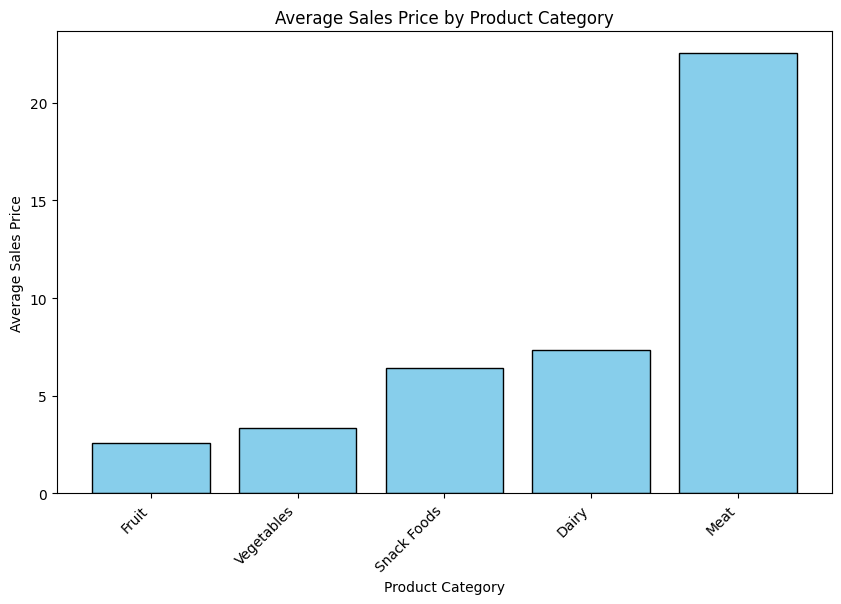

In [ ]:
categories = [c[0] for c in avg_sales_by_category]
avg_prices = [c[1] for c in avg_sales_by_category]

plt.figure(figsize=(10,6))
plt.bar(categories, avg_prices, color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category")
plt.ylabel("Average Sales Price")
plt.title("Average Sales Price by Product Category")
plt.show()